# 資管四 唐瑋廷 B05705043 HW3

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import MDS
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.decomposition import KernelPCA
from sklearn.manifold import TSNE

## Q1

read dataset

In [2]:
stu_adm = pd.read_csv('ds/student_admission106.csv', encoding="utf-8", dtype=str)
uname = pd.read_csv('ds/univ_name106short1.csv', encoding="utf-8", dtype=str)

all_depid = stu_adm['department_id'].unique()
all_stuid = stu_adm['student_id'].unique()

ndepid = all_depid.shape[0]
nstuid = all_stuid.shape[0]
print("There are %d students and %d departments in total." % (nstuid, ndepid))

print("offers received by students:")
stu_adm.head(10)

There are 60461 students and 1976 departments in total.
offers received by students:


,school_id,department_id,student_id,student_name,state,location1,location2
0,001,001012,10246842,黃士玹,正1,南部,台南考區
1,001,001012,10042237,黃冠婷,正2,北部,台北考區
2,001,001012,10008031,鍾大方,正3,北部,台北考區
3,001,001012,10201525,曾信豪,正4,中部,彰化考區
4,001,001012,10014615,陳品儒,正5,北部,台北考區
5,001,001012,10294018,侯思筠,正6,東部,宜蘭考區
6,001,001012,10022810,吳悅慈,正7,北部,台北考區
7,001,001012,10236223,陳俞潔,正8,南部,台南考區
8,001,001012,10025909,蕭宇廷,正9,北部,台北考區
9,001,001012,10123708,吳岱軒,正10,北部,中壢考區


In [3]:
print("academic department basic information:")
uname.head(10)

academic department basic information:


,year,school_id,department_id,school_name,department_name,category_id,category_name,school_name_abbr,department_name_abbr
0,106,006,006042,國立政治大學,教育學系,1,教育,政大,教育
1,106,006,006052,國立政治大學,教育學系(公費生),1,教育,政大,教育(公)
2,106,006,006062,國立政治大學,教育學系(原住民公費生),1,教育,政大,教育(原住民)
3,106,006,006022,國立政治大學,歷史學系,2,藝術及人文,政大,歷史
4,106,006,006152,國立政治大學,民族學系,2,藝術及人文,政大,民族學
5,106,006,006032,國立政治大學,哲學系,2,藝術及人文,政大,哲學
6,106,006,006262,國立政治大學,英國語文學系,2,藝術及人文,政大,英國語文
7,106,006,006292,國立政治大學,日本語文學系,2,藝術及人文,政大,日本語文
8,106,006,006272,國立政治大學,阿拉伯語文學系,2,藝術及人文,政大,阿拉伯語文
9,106,006,006302,國立政治大學,韓國語文學系,2,藝術及人文,政大,韓國語文


convert into a matrix

In [4]:
matrix = pd.crosstab(stu_adm.department_id, stu_adm.student_id)
matrix

student_id,10000101,10000106,10000110,10000111,10000112,10000114,10000116,10000120,10000121,10000123,...,NTU0604948,NTU0604951,NTU0604964,NTU0604970,NTU0604975,NTU0604991,NTU0604992,NTU0604995,NTU0605007,NTU0605019
department_id,,,,,,,,,,,,,,,,,,,,,
001012,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
001022,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
001032,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
001042,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
001052,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153142,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
153152,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
153162,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


剔除人數少於十人的系所以及申請少於兩間的學生

In [5]:
while True:
    old_shape = matrix.shape
    matrix = matrix.loc[:, ~(matrix.sum(axis=0) < 2)]
    matrix = matrix[~(matrix.sum(axis=1) < 10)]
    if old_shape == matrix.shape: break

### Q1.1

In [6]:
print(f'the number of academic departments: {matrix.shape[0]}')
print(f'the number of student applicants: {matrix.shape[1]}')

the number of academic departments: 1917
the number of student applicants: 47386


### Q1.2

In [7]:
top_10 = matrix.sum(axis=1).sort_values(ascending=False)[:10]
for idx, cnt in zip(top_10.index, top_10.values):
    name = uname[uname['department_id'] == idx][['school_name_abbr', 'department_name_abbr']].values[0]
    name = ''.join(name)
    print(f'department id: {idx}, department name: {name}, number of applications: {cnt}')

department id: 008122, department name: 中原機械工程學, number of applications: 386
department id: 012052, department name: 中醫藥學, number of applications: 376
department id: 046032, department name: 銘傳會計（臺北）, number of applications: 367
department id: 004382, department name: 成大電機, number of applications: 357
department id: 008112, department name: 中原土木, number of applications: 353
department id: 005192, department name: 東吳企業管理, number of applications: 353
department id: 005182, department name: 東吳會計, number of applications: 351
department id: 015342, department name: 逢甲財金, number of applications: 340
department id: 045012, department name: 義守電機, number of applications: 339
department id: 015222, department name: 逢甲資工, number of applications: 329


## Q2

取得所有的 categories 種類，以及對應的顏色

In [8]:
cid = uname['category_id'].unique()
color_dict = {}
for k, v in zip(cid, ['lightpink', 'red', 'orange', 'yellow', 'springgreen', 'green', 'royalblue', 'navy', 'violet', 'purple', 'gray']):
    color_dict[k] = v

每 matrix 轉成 numpy array

In [9]:
features = matrix.values

取出每個 department 的 category name，以及對應的顏色

In [10]:
cid_all = []
for idx in matrix.index.values:
    cid_all.append(uname.loc[uname['department_id'] == idx, 'category_id'].iloc[0])
cid_all = np.array(cid_all)

color_map = []
for c in cid_all:
    color_map.append(color_dict[c])

做 8 components 的 pca

In [11]:
pca = PCA(n_components=8)
features_reduce = pca.fit_transform(features)

visualize

分別用 (p1, p2), (p3, p4), (p5, p6), (p7, p8) 視覺化

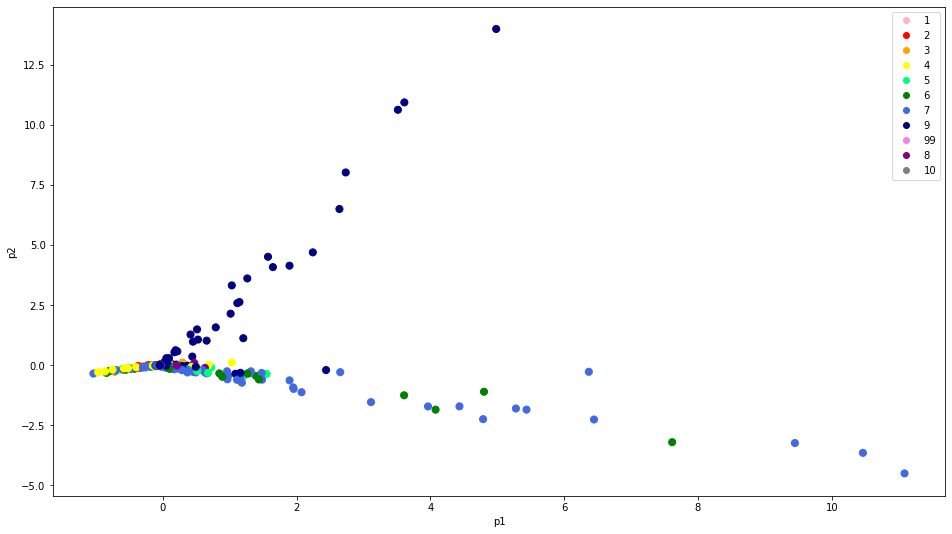

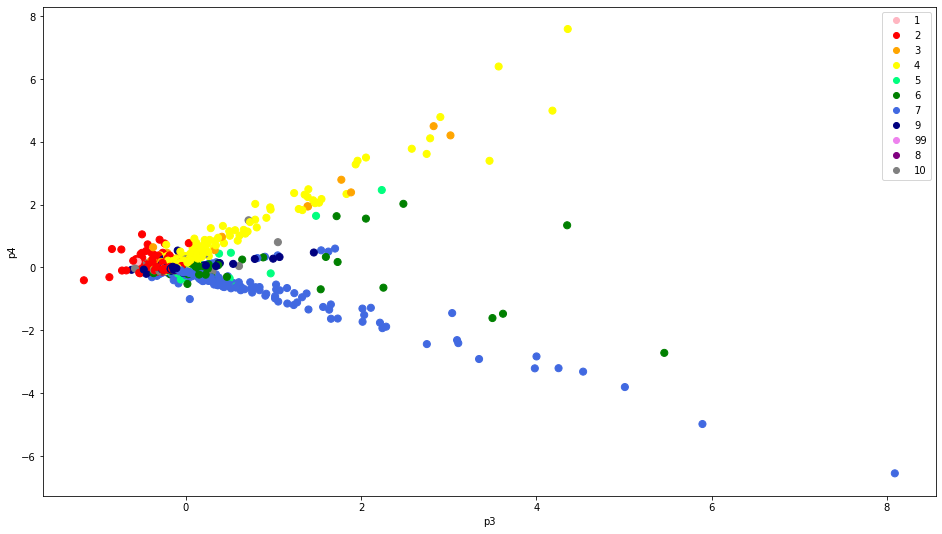

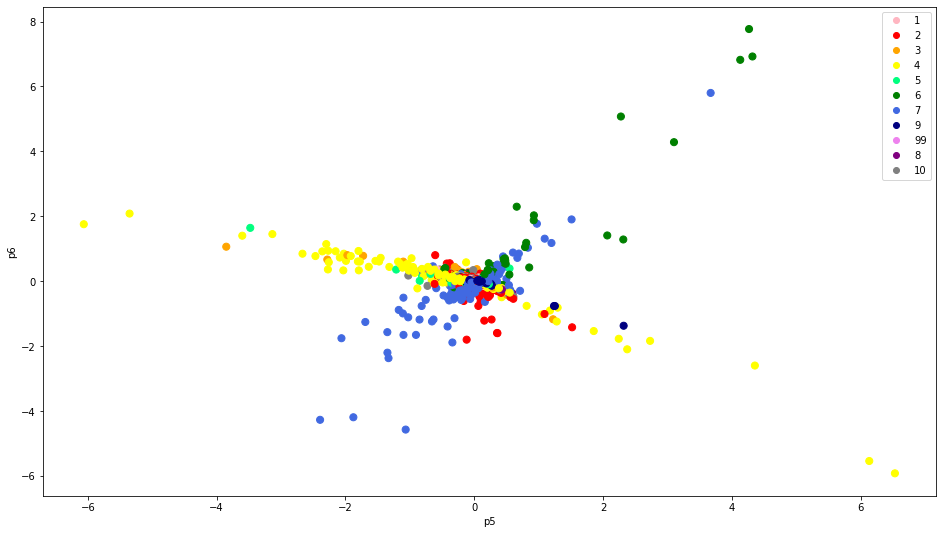

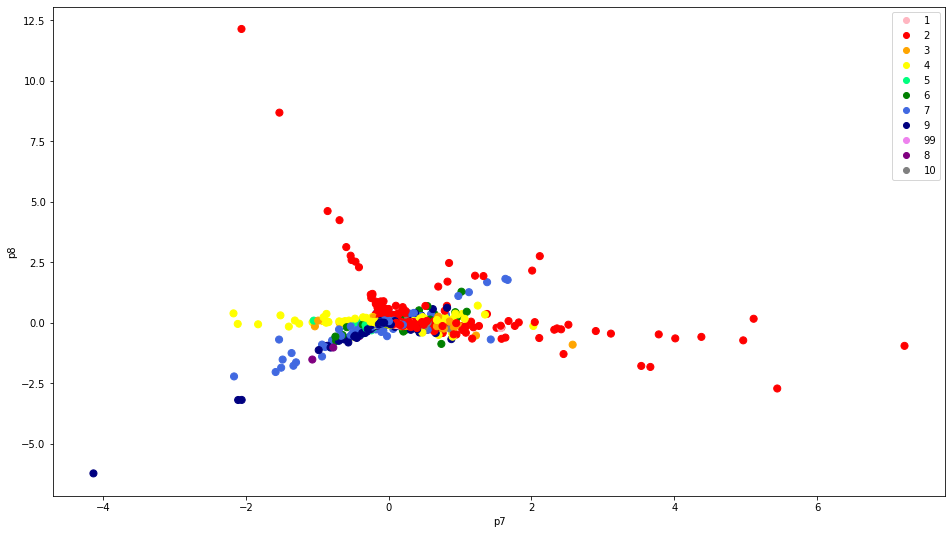

In [12]:
plt.rcParams["figure.figsize"] = (16, 9)
for i in range(0, 8, 2):
    plt.xlabel(f'p{i+1}')
    plt.ylabel(f'p{i+2}')    
    plt.scatter(features_reduce[:,i], features_reduce[:,i+1], s=50, c=color_map)
    markers = [plt.Line2D([0,0], [0,0], color=color, marker='o', linestyle='') for color in color_dict.values()]
    plt.legend(markers, color_dict.keys(), numpoints=1)
    plt.show()

由散佈圖大致上可以看出，每個科系類別屬性的科系，比較靠近彼此，走勢較為相似。而且根據選擇不同的components，能看出差異的科系類別也有所不同。

### Q2.2

metric

In [13]:
features_mds = MDS(n_components=2, metric=True).fit_transform(features)
features_mds.shape

(1917, 2)

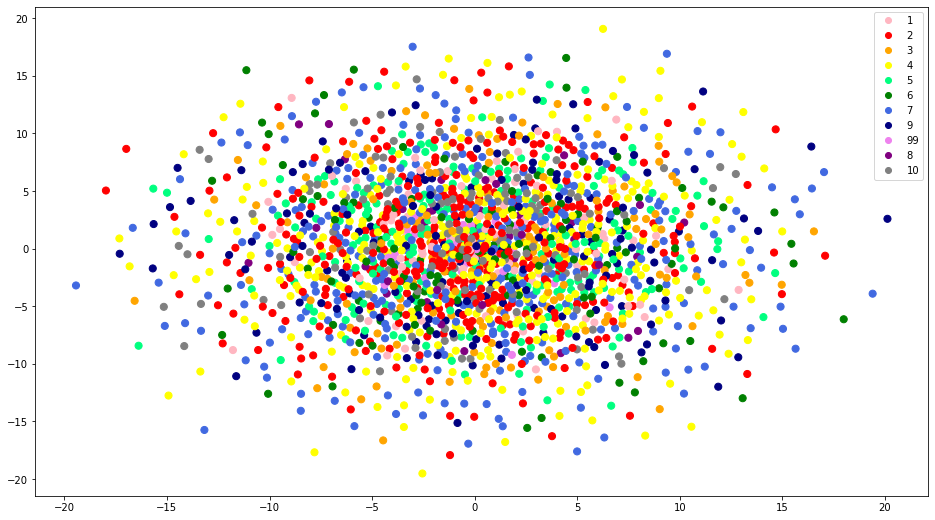

In [14]:
plt.scatter(features_mds[:,0], features_mds[:,1], s=50, c=color_map)
markers = [plt.Line2D([0,0], [0,0], color=color, marker='o', linestyle='') for color in color_dict.values()]
plt.legend(markers, color_dict.keys(), numpoints=1)
plt.show()

non-metric

In [15]:
features_mds = MDS(n_components=2, metric=False).fit_transform(features)
features_mds.shape

(1917, 2)

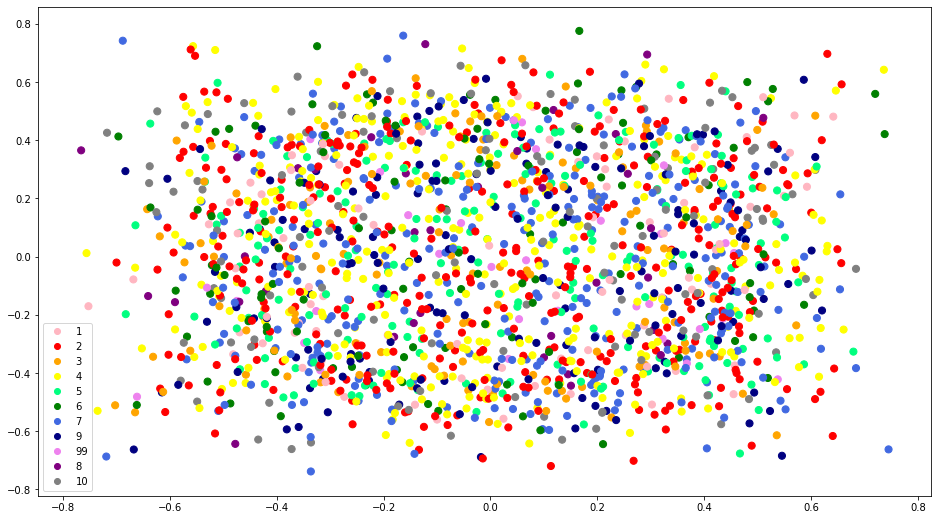

In [16]:
plt.scatter(features_mds[:,0], features_mds[:,1], s=50, c=color_map)
markers = [plt.Line2D([0,0], [0,0], color=color, marker='o', linestyle='') for color in color_dict.values()]
plt.legend(markers, color_dict.keys(), numpoints=1)
plt.show()

兩種mds的資料點都相當散亂，效果不太理想。

### Q2.3

20 neighbors

In [ ]:
features_lle = LocallyLinearEmbedding(n_neighbors=20, n_components=2).fit_transform(features)
features_lle.shape

In [ ]:
plt.scatter(features_lle[:,0], features_lle[:,1], s=50, c=color_map)
markers = [plt.Line2D([0,0], [0,0], color=color, marker='o', linestyle='') for color in color_dict.values()]
plt.legend(markers, color_dict.keys(), numpoints=1)
plt.show()

40 neighbors

In [ ]:
features_lle = LocallyLinearEmbedding(n_neighbors=40, n_components=2).fit_transform(features)
features_lle.shape

In [ ]:
plt.scatter(features_lle[:,0], features_lle[:,1], s=50, c=color_map)
markers = [plt.Line2D([0,0], [0,0], color=color, marker='o', linestyle='') for color in color_dict.values()]
plt.legend(markers, color_dict.keys(), numpoints=1)
plt.show()

20 neighbors + pca

In [17]:
features_pca = PCA(n_components=100).fit_transform(features)
features_lle = LocallyLinearEmbedding(n_neighbors=20, n_components=2).fit_transform(features_pca)
features_lle.shape

(1917, 2)

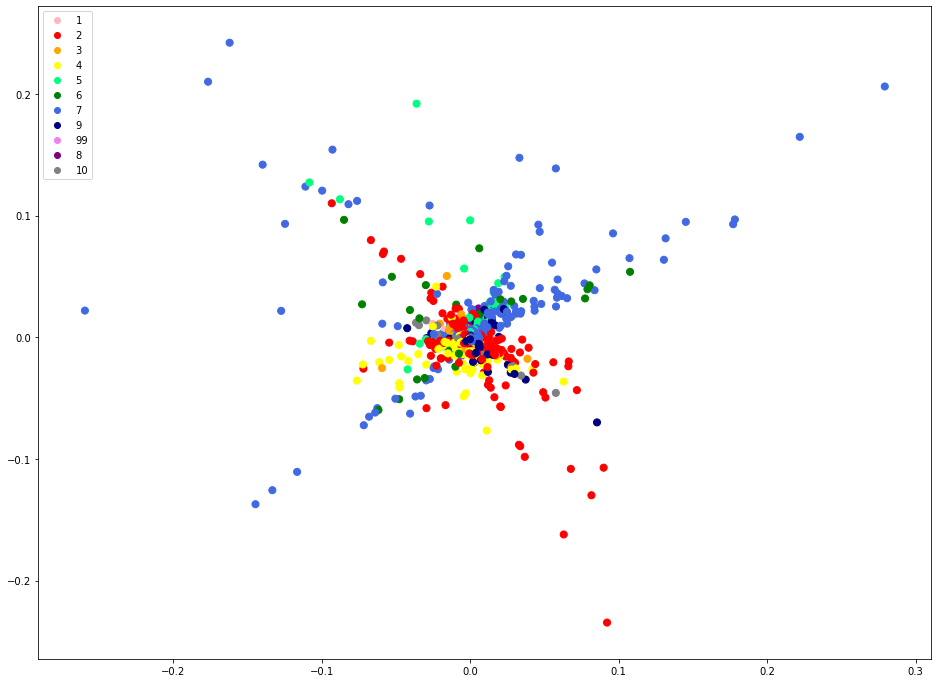

In [20]:
plt.scatter(features_lle[:,0], features_lle[:,1], s=50, c=color_map)
markers = [plt.Line2D([0,0], [0,0], color=color, marker='o', linestyle='') for color in color_dict.values()]
plt.legend(markers, color_dict.keys(), numpoints=1)
plt.show()

大致可以看出走勢，但像是黃色、深藍色，就混在中間，不是很明顯。

## 2.4

RBF

In [18]:
features_kpca = KernelPCA(n_components=2, kernel='rbf').fit_transform(features)
features_kpca.shape

(1917, 2)

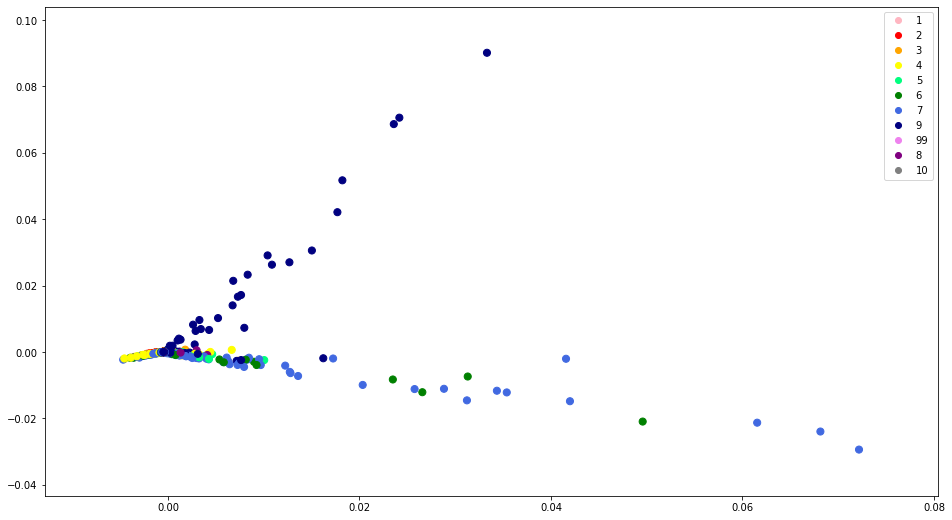

In [19]:
plt.scatter(features_kpca[:,0], features_kpca[:,1], s=50, c=color_map)
markers = [plt.Line2D([0,0], [0,0], color=color, marker='o', linestyle='') for color in color_dict.values()]
plt.legend(markers, color_dict.keys(), numpoints=1)
plt.show()

Cosine

In [21]:
features_kpca = KernelPCA(n_components=2, kernel='cosine').fit_transform(features)
features_kpca.shape

(1917, 2)

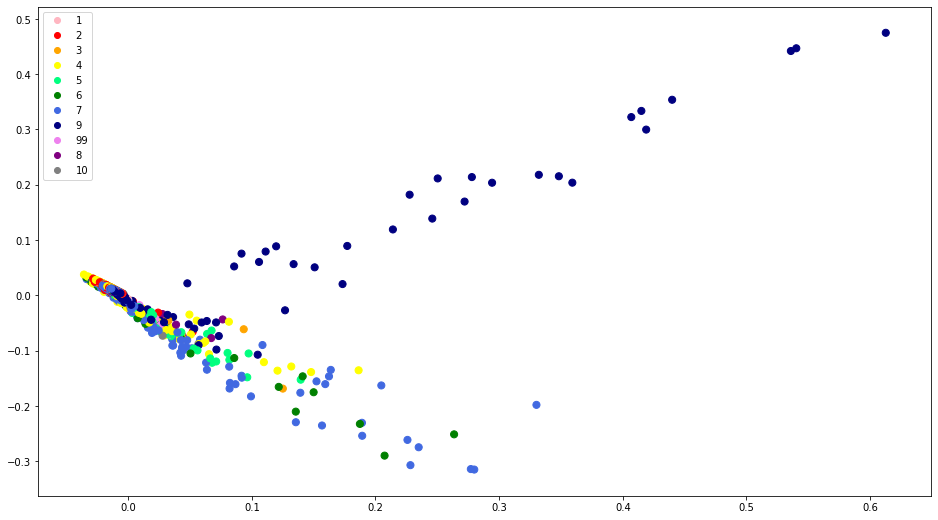

In [22]:
plt.scatter(features_kpca[:,0], features_kpca[:,1], s=50, c=color_map)
markers = [plt.Line2D([0,0], [0,0], color=color, marker='o', linestyle='') for color in color_dict.values()]
plt.legend(markers, color_dict.keys(), numpoints=1)
plt.show()

### Q2.5

Euclidian

In [ ]:
features_tsne = TSNE(n_components=2, metric='euclidean', random_state=999).fit_transform(features)
features_tsne.shape

In [ ]:
plt.scatter(features_tsne[:,0], features_tsne[:,1], s=50, c=color_map)
markers = [plt.Line2D([0,0], [0,0], color=color, marker='o', linestyle='') for color in color_dict.values()]
plt.legend(markers, color_dict.keys(), numpoints=1)
plt.show()

Cosine

In [ ]:
features_tsne = TSNE(n_components=2, metric='cosine', random_state=999).fit_transform(features)
features_tsne.shape

In [ ]:
plt.scatter(features_tsne[:,0], features_tsne[:,1], s=50, c=color_map)
markers = [plt.Line2D([0,0], [0,0], color=color, marker='o', linestyle='') for color in color_dict.values()]
plt.legend(markers, color_dict.keys(), numpoints=1)
plt.show()

Jaccard

In [ ]:
features_tsne = TSNE(n_components=2, metric='jaccard', random_state=999).fit_transform(features)
features_tsne.shape

In [ ]:
plt.scatter(features_tsne[:,0], features_tsne[:,1], s=50, c=color_map)
markers = [plt.Line2D([0,0], [0,0], color=color, marker='o', linestyle='') for color in color_dict.values()]
plt.legend(markers, color_dict.keys(), numpoints=1)
plt.show()

## Q3

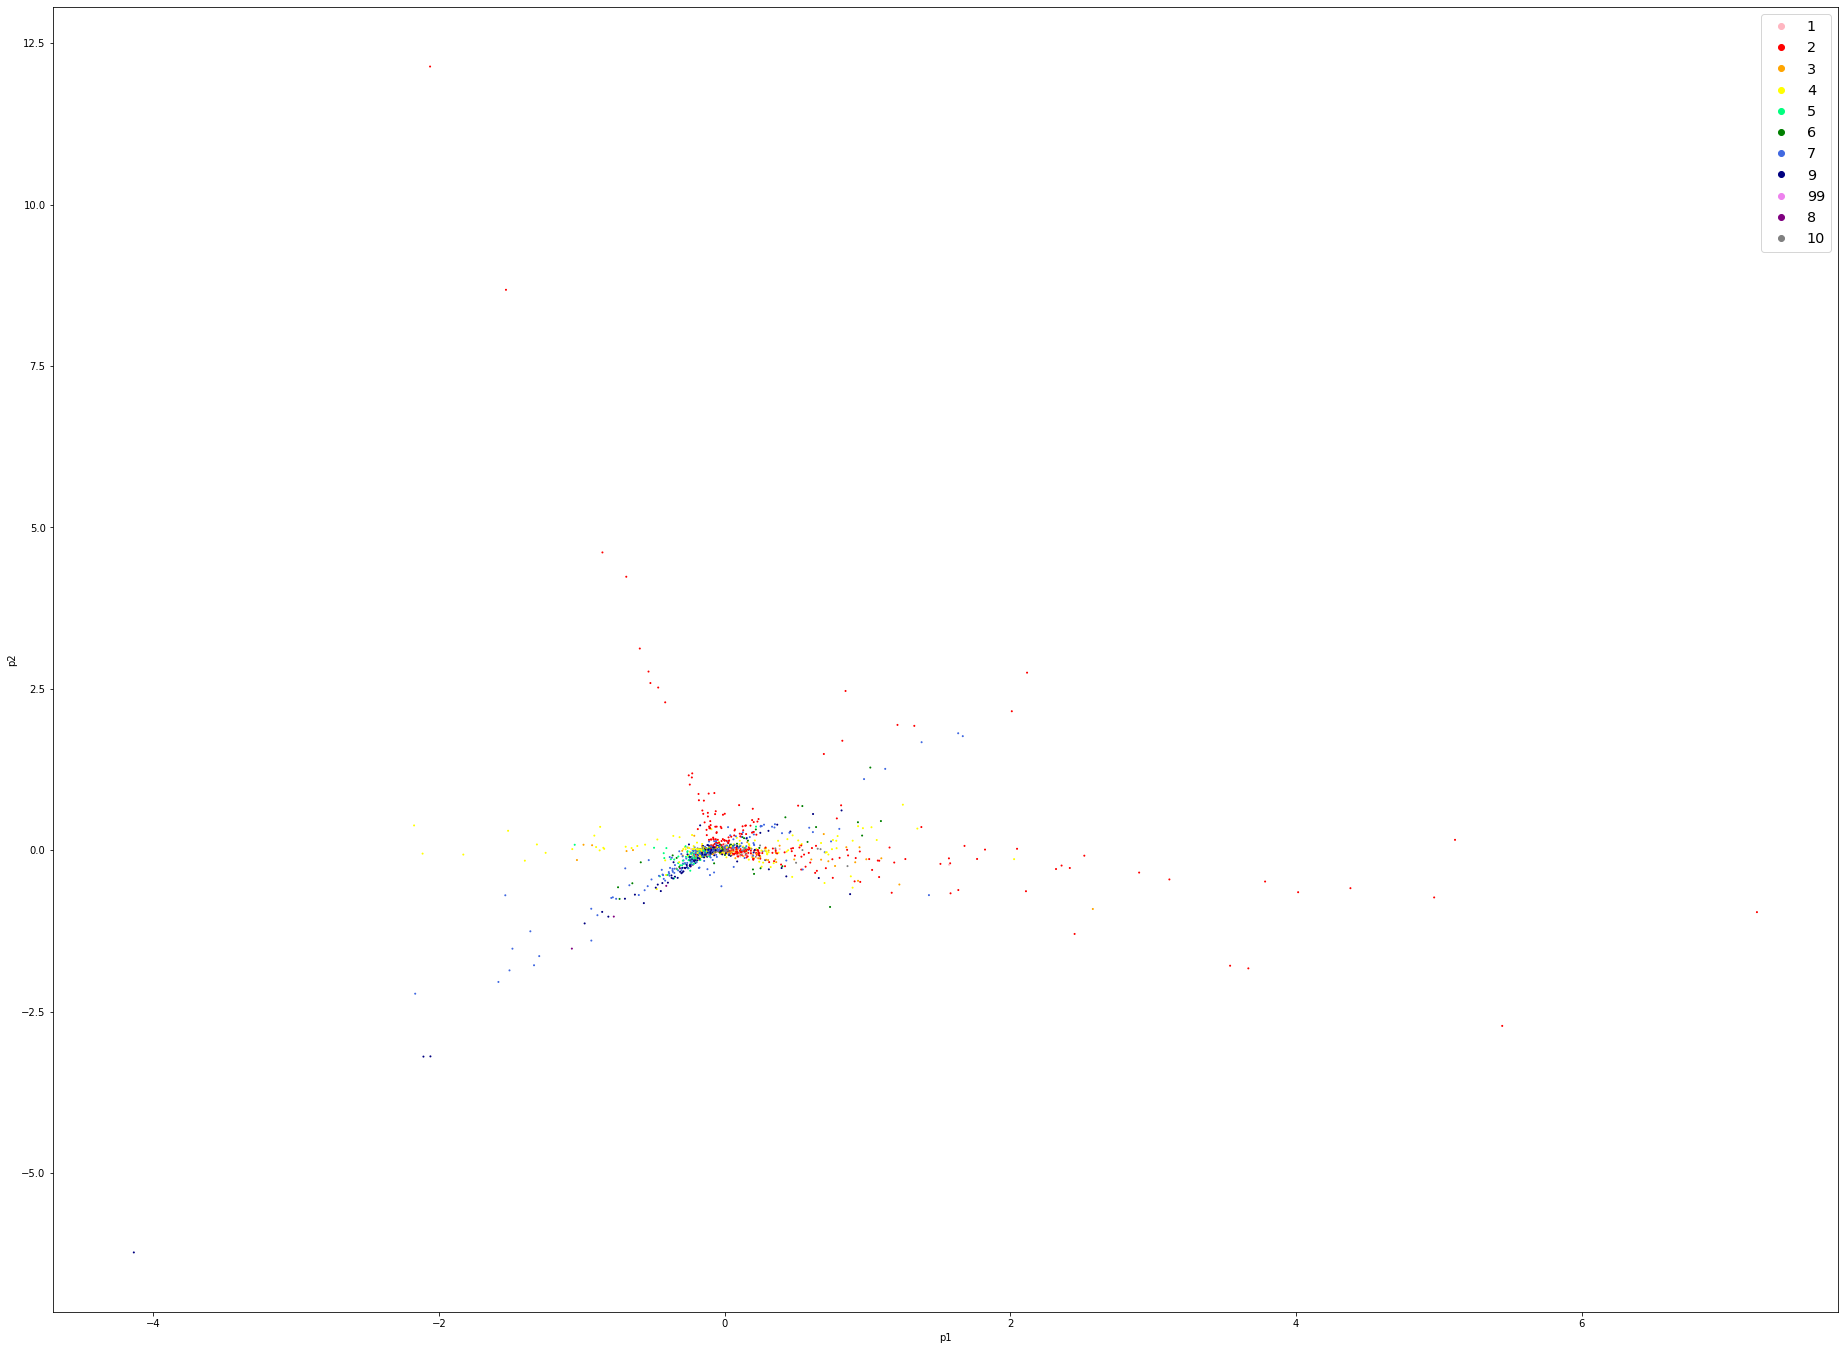

In [22]:
# plt.xlabel('p1')
# plt.ylabel('p2')    
# plt.scatter(features_reduce[:,i], features_reduce[:,i+1], s=1, c=color_map)
# markers = [plt.Line2D([0,0], [0,0], color=color, marker='o', linestyle='') for color in color_dict.values()]
# plt.legend(markers, color_dict.keys(), numpoints=1, fontsize="x-large")

# fig = plt.gcf()
# fig.set_size_inches(32, 24)
# plt.savefig('q3.png', dpi=300)